In [1]:
using AlgebraicPetri

using OrdinaryDiffEq
using StochasticDiffEq
using DiffEqJump
using Plots
using LabelledArrays
using Catlab
using Catlab.Graphics
using Catlab.WiringDiagrams
using Catlab.CategoricalAlgebra
using Catlab.Programs.RelationalPrograms

display_uwd(ex) = to_graphviz(ex, box_labels=:name, junction_labels=:variable, edge_attrs=Dict(:len=>".75"));

In [13]:
sirLabeledRates = LabelledReactionNet{Float64, Float64}([:S=>100, :I=>1, :R=>0], (:inf=>0.01)=>((:S,:I)=>(:I,:I)), (:rec=>0.2)=>(:I=>:R))

T,rate,tname
1,0.01,inf
2,0.2,rec
S,concentration,sname
1,100.0,S
2,1.0,I
3,0.0,R
I,it,is
1,1,1
2,1,2
3,2,2


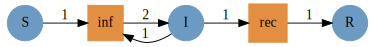

In [14]:
Graph(sirLabeledRates)

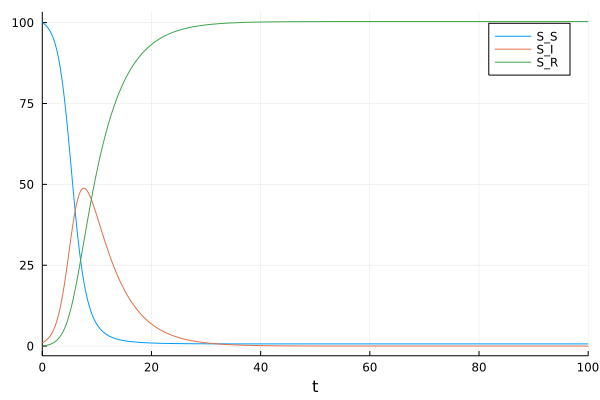

In [12]:
timespan = (0.0, 100.0);
problem = ODEProblem(vectorfield(sirLabeledRates), concentrations(sirLabeledRates), timespan, rates(sirLabeledRates));
sol = solve(problem, Tsit5());
plot(sol)